# Import data

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_palette(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])


In [2]:
directory = 'C:\\Users\\prakash pc\\Desktop\\Data analysis Project\\New folder\\ecommerce_sales_analysis\\dataset'

files = [file for file in os.listdir(directory)] 
df = pd.DataFrame()
for i in files:
    data = pd.read_csv('dataset/'+i)
    df = pd.concat([df,data],axis=0)
df.shape

(186850, 6)

# Data cleaning

In [3]:
#Exclude header for each dataset inside dataframe
df = df[df['Order ID'] != 'Order ID']

In [4]:
df = df.reset_index()
df = df.drop(columns='index')

In [5]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
84553,230025,27in 4K Gaming Monitor,1,389.99,07/27/19 20:37,"696 9th St, Los Angeles, CA 90001"
84013,229509,USB-C Charging Cable,1,11.95,07/13/19 13:45,"440 2nd St, San Francisco, CA 94016"
1055,177563,AA Batteries (4-pack),1,3.84,04/24/19 18:52,"90 Johnson St, San Francisco, CA 94016"
174253,278244,USB-C Charging Cable,1,11.95,10/30/19 12:11,"963 Ridge St, Portland, OR 97035"
132962,206200,AA Batteries (4-pack),1,3.84,05/05/19 08:41,"528 Washington St, Dallas, TX 75001"


In [6]:
#Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186495 entries, 0 to 186494
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


There is feature that have incorrect type in Quantity Ordered, Price Each and Order Date.

In [7]:
#Check null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
#Check null values
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1430,NaN,NaN,NaN,NaN,NaN,NaN
1550,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184825,NaN,NaN,NaN,NaN,NaN,NaN
185087,NaN,NaN,NaN,NaN,NaN,NaN
185690,NaN,NaN,NaN,NaN,NaN,NaN
186196,NaN,NaN,NaN,NaN,NaN,NaN


Missing values caused by no entry avalaible.

In [9]:
#Drop null vales
df = df.dropna()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186490,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186491,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186492,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186493,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Data preparation

In [10]:
#Correcting data types
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
#Adding new feature
def feature_extraction(data):
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data 

In [12]:
df = feature_extraction(df)
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
108452,165238,AAA Batteries (4-pack),1,2.99,2019-03-19 01:27:00,"620 Willow St, Los Angeles, CA 90001",2019,3,1,27,2.99,Los Angeles (CA)
66858,161472,AAA Batteries (4-pack),1,2.99,2019-02-25 05:38:00,"750 Ridge St, Los Angeles, CA 90001",2019,2,5,38,2.99,Los Angeles (CA)
174524,278502,USB-C Charging Cable,1,11.95,2019-10-22 14:23:00,"802 Maple St, New York City, NY 10001",2019,10,14,23,11.95,New York City (NY)


# Analysis

## Descriptive analysis
descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [13]:
df.describe()

,Quantity Ordered,Price Each,Order Date,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464,2019.000183,7.059140,14.413305,29.481361,185.490917
min,1.000000,2.990000,2019-01-01 03:07:00,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019-04-16 21:05:15,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019-07-17 20:40:30,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019-10-26 08:14:00,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020-01-01 05:13:00,2020.000000,12.000000,23.000000,59.000000,3400.000000
std,0.442793,332.731330,NaN,0.013521,3.502996,5.423416,17.317573,332.919771


There is still data in year 2020, lets exclude them.

In [14]:
#Select only for year 2019
df = df[df['Year']==2019]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185916 entries, 0 to 186494
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  object        
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  int64         
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Purchase Address  185916 non-null  object        
 6   Year              185916 non-null  int32         
 7   Month             185916 non-null  int32         
 8   Hour              185916 non-null  int32         
 9   Minute            185916 non-null  int32         
 10  Sales             185916 non-null  float64       
 11  Cities            185916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(4)
memory usage: 15.6+ MB


In [16]:
total_year_order = df.shape[0]
total_product_sold = df['Quantity Ordered'].sum()
total_year_sales = df['Sales'].sum()

print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 185,916 orders
Total products sold in 2019 : 209,038 items
Total sales in 2019 : 34,483,365.68 USD


## Univariate analysis
Univariate analysis is basically the simplest form to analyze data. The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data.

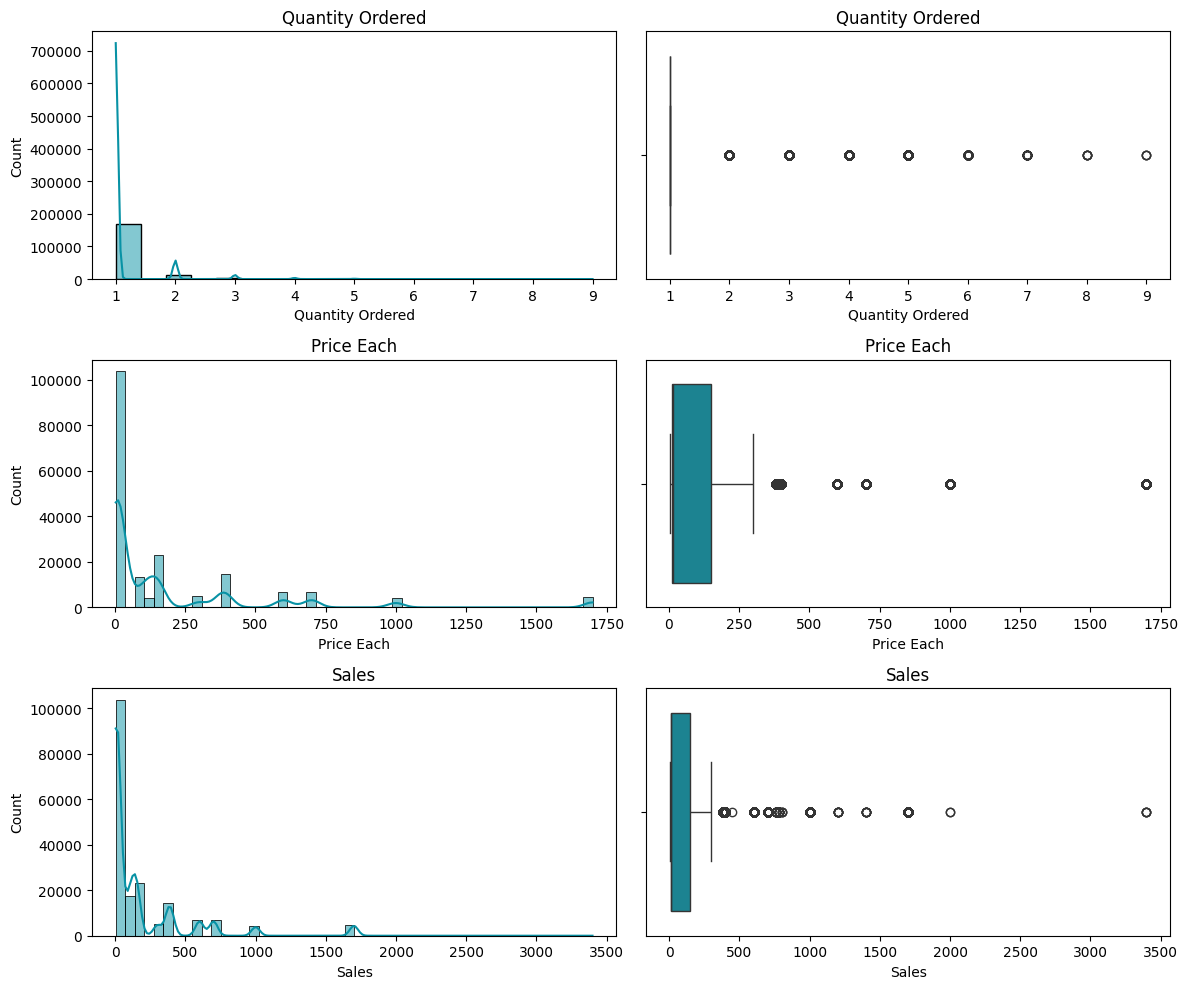

In [17]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
sns.histplot(data=df,x='Quantity Ordered',kde=True,ax=ax[0,0])
sns.histplot(data=df,x='Price Each',kde=True,ax=ax[1,0],bins=50)
sns.histplot(data=df,x='Sales',kde=True,ax=ax[2,0],bins=50)

ax[0,0].set_title('Quantity Ordered')
ax[1,0].set_title('Price Each')
ax[2,0].set_title('Sales')

sns.boxplot(data=df,x='Quantity Ordered',ax=ax[0,1])
sns.boxplot(data=df,x='Price Each',ax=ax[1,1])
sns.boxplot(data=df,x='Sales',ax=ax[2,1])

ax[0,1].set_title('Quantity Ordered')
ax[1,1].set_title('Price Each')
ax[2,1].set_title('Sales')

plt.tight_layout()
plt.show()

Interpretation :
- Every Month most of the customers buy 1 item , some customers buy 2 items and rarely any customer buys more than 2 items
- Price per item mostly in range 11.95 to 150.00.
- Sales range are 11.95 to 150.00. 

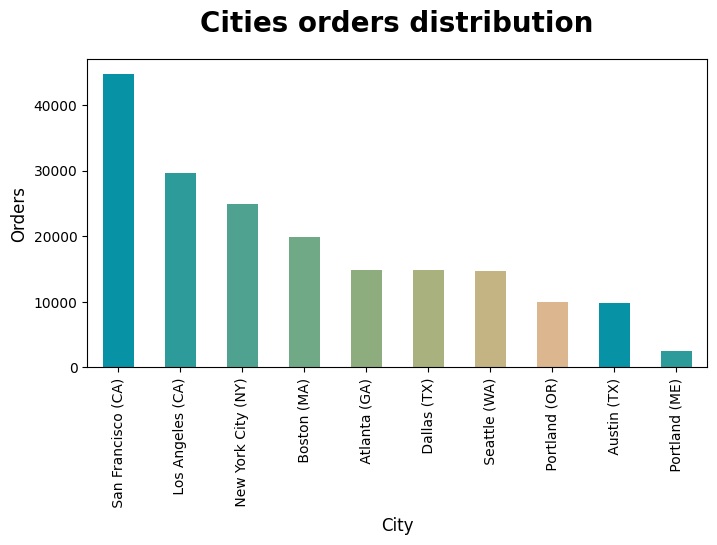

In [21]:
plt.figure(figsize=(8,4))

df['Cities'].value_counts().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
# sns.countplot(df['Cities'])
plt.title('Cities orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('City',fontsize=12)
plt.show()

Most of orders are from California (CA) specificly from San Francisco and Los Angeles around more than 40,000 and 30,000 orders. Average orders in cities are around 18,000 orders.

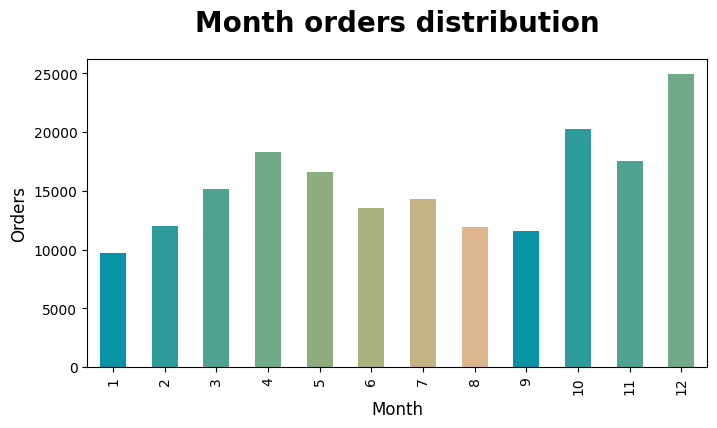

In [22]:
plt.figure(figsize=(8,4))
df['Month'].value_counts().sort_index().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Month orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.show()

High order are happend in December and October that have 25,000 and 20,000 orders. There is increasing order in January to April then decrease to September.

## Multivariate Analysis
Multivariate analysis is defined as: The statistical study of data where multiple measurements are made on each experimental unit and where the relationships among multivariate measurements and their structure are important.

In [34]:

numeric_df = df.select_dtypes(include=[np.number])

numeric_df

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
0,2,11.95,2019,4,8,46,23.90
2,1,99.99,2019,4,22,30,99.99
3,1,600.00,2019,4,14,38,600.00
4,1,11.99,2019,4,14,38,11.99
5,1,11.99,2019,4,9,27,11.99
...,...,...,...,...,...,...,...
186490,3,2.99,2019,9,20,56,8.97
186491,1,700.00,2019,9,16,0,700.00
186492,1,700.00,2019,9,7,39,700.00
186493,1,379.99,2019,9,17,30,379.99


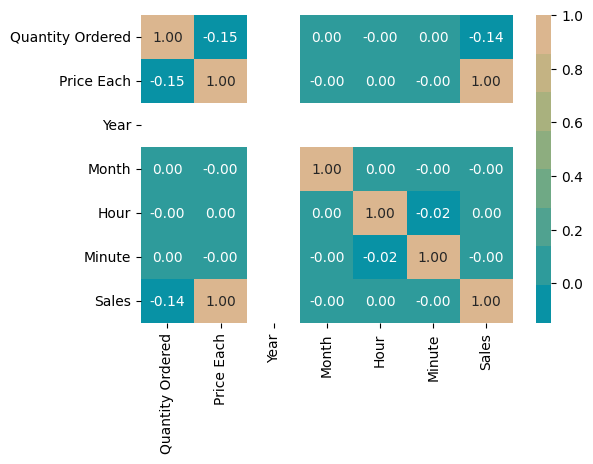

In [37]:
from matplotlib.colors import ListedColormap

colors = ['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f']
cmap = ListedColormap(colors)

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), fmt='.2f',annot=True,cmap=cmap)
plt.show()

Higher Number of items where Ordered which had a low price
Lower Number of items with high price were ordered
Other features seem to have a weak corelation

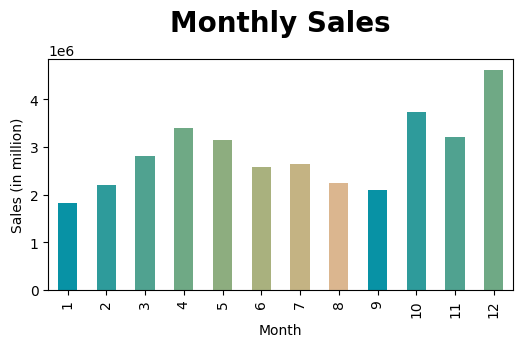

In [39]:
df_month = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(6,3))
df_month.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Monthly Sales',weight='bold',fontsize=20,pad=20)
plt.ylabel('Sales (in million)')
plt.show()

No of orders were high in December and October that were approx 4,5 million and 3,5 million. No of orders are seen to be increased in January to April then decrease to September.

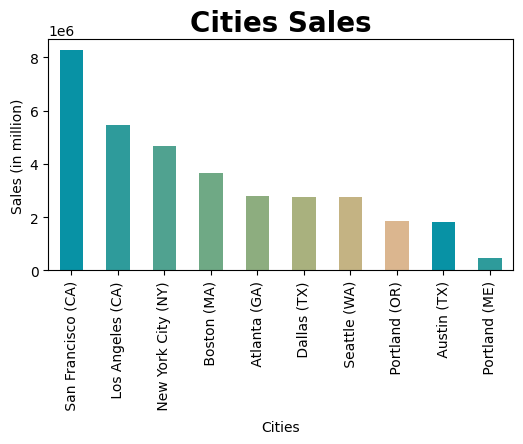

In [42]:
df_city = df.groupby('Cities')['Sales'].sum()
plt.figure(figsize=(6,3))
df_city.sort_values(ascending=False).plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Cities Sales',weight='bold',fontsize=20)
plt.ylabel('Sales (in million)')

plt.show()

Highest sales are from San Francisco around 8,1 million.

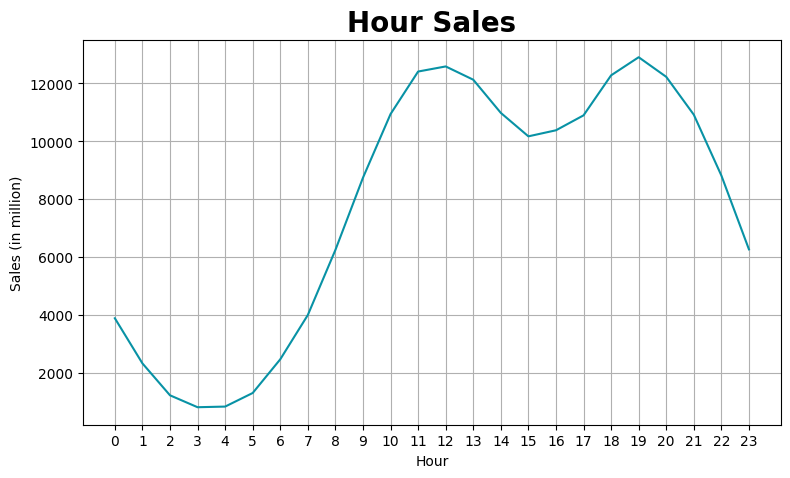

In [44]:
df_hour = df.groupby('Hour')['Quantity Ordered'].count()
plt.figure(figsize=(9,5))
plt.plot(df_hour.index,df_hour.values)
plt.title('Hour Sales',weight='bold',fontsize=20)
plt.grid(True)
plt.xticks(ticks=df_hour.index)
plt.ylabel('Sales (in million)')
plt.xlabel('Hour')


plt.show()


Sales peaked around hour 12 to hour 19

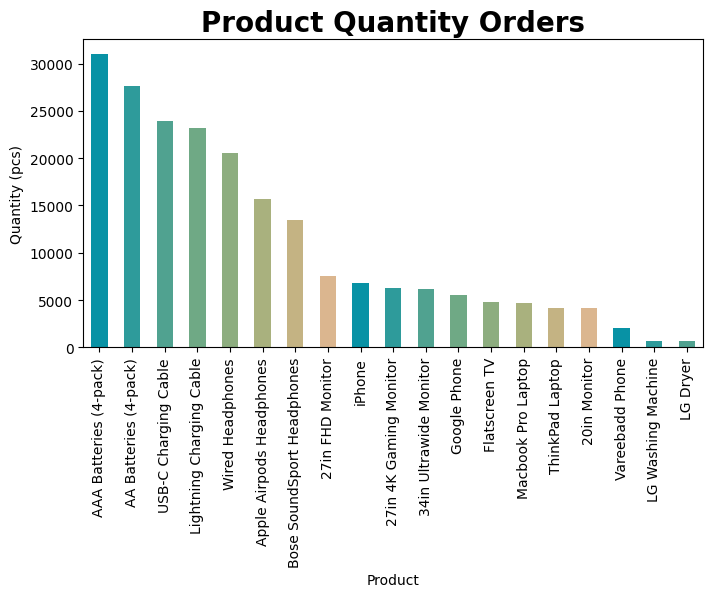

In [46]:
df_product = df.groupby('Product')['Quantity Ordered'].sum()
df_product = df_product.sort_values(ascending=False)

plt.figure(figsize=(8,4))
df_product.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Product Quantity Orders',weight='bold',fontsize=20)

plt.ylabel('Quantity (pcs)')

plt.show()


Top products sold are  Battery products, followed by Charging Cable, and Headphones.


# Summary

In [47]:
print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 185,916 orders
Total products sold in 2019 : 209,038 items
Total sales in 2019 : 34,483,365.68 USD


Analysis result for E-commerce sales data :
1. Summary metrics :
    - Total orders in 2019 : 185,916 orders
    - Total products sold in 2019 : 209,038 items
    - Total sales in 2019 : 34,483,365.68 USD
    - Sales range are 11.95 to 150.00.
    - Most of orders are from San Francisco (CA) with 40,000 orders and 8,1 million sales. 
    - Average orders in cities are around 18,000 orders.
    

2. Customer behavior :
    - Mostly customer orders 1 item, some  buy 2 items  and rarely some buy more than 2 items
    - There is peak of sales  around 9:00 to 21:00. This data can support to post advertising on that time.
    - Most product sold are on Battery products, then followed by Charging Cable, and Headphones.
    - No of orders were high in December and October that were approx 4,5 million and 3,5 million. No of orders are seen to be increased in January to April then decrease towards September.

       